In [1]:
# -*- coding: utf-8 -*-
# Date: 2020-11-23-Mon
# Author: Inyong Hwang (inyong1020@gmail.com)

# Setup Tool-Option-Site, Editor
# Setup Runtime-Runtime Type Change

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# OpenCV
# https://colab.research.google.com/drive/1RWGmqoEQdeyh5TssoGtsXsFk8hbLGtWp

!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg

import numpy as np

boring_list = [1, 2, 3]
fun_array = np.array(boring_list)

ones = np.ones(3)
result = fun_array + ones + np.zeros(3)

print(result)

boring_mtx = [[1, 2], [3, 4]]
ones = np.ones((2, 2))
identity = np.eye(2)

try:
  result = boring_mtx + identity
  print(result)
except:
  print('Can I do this?')

rando_mtx = np.random.random((100, 100))

print(np.linalg.norm(rando_mtx))

print(np.linalg.norm(rando_mtx, axis=0))
print(np.linalg.norm(rando_mtx, ord=2))

rando_mtx = np.eye(rando_mtx.shape[0]) * rando_mtx

rando_mtx += 1

mtx1 = np.random.random((8, 1, 7, 1))
mtx2 = np.random.random((8, 2, 1, 9))

res = mtx1 * mtx2

res2 = mtx1.dot(mtx2)

print(np.array_equal(res, res2), res.shape, res2.shape)

--2020-11-23 16:55:06--  https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.org (www.duckietown.org)... 104.26.2.173, 104.26.3.173, 172.67.73.78
Connecting to www.duckietown.org (www.duckietown.org)|104.26.2.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154197 (151K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>] 150.58K  --.-KB/s    in 0.02s   

2020-11-23 16:55:06 (5.92 MB/s) - ‘dt.jpg’ saved [154197/154197]

[2. 3. 4.]
[[2. 2.]
 [3. 5.]]
57.86087568525493
[5.87784128 5.40039482 5.7540024  6.05448659 5.68360909 5.91937237
 6.09236775 5.51058435 5.65220068 5.61954022 5.65152771 5.59379066
 5.77162023 5.98442759 5.97199876 5.69625973 5.59951951 5.97924533
 5.64713908 5.54608749 5.73667749 5.6846783  5.87063117 5.93367891
 5.59020718 5.87739468 6.02713785 5.53589176 6.06655186 5.78735012
 5.97460712 6.10257576 5.54575361 5.713745   6.01801463 5.8935601
 6.06195812 6

<class 'numpy.ndarray'>


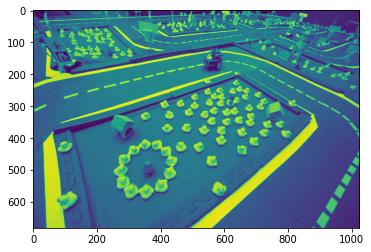

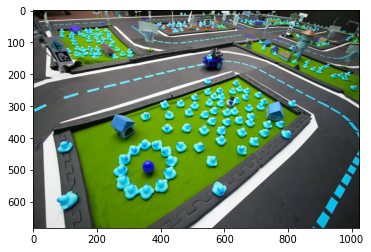

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('./dt.jpg', 0)

print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('./dt.jpg')

plt.imshow(img)
plt.show()
# cv2.imshow('Image', img)

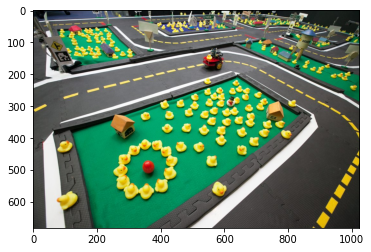

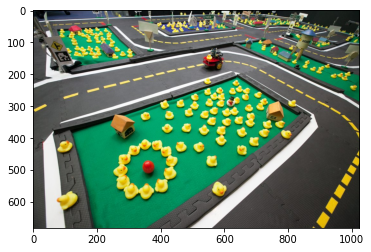

In [7]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

imgrbg = img[:, :, ::-1]
plt.imshow(imgrgb)
plt.show()

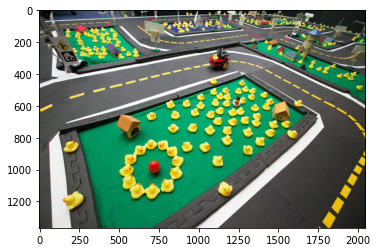

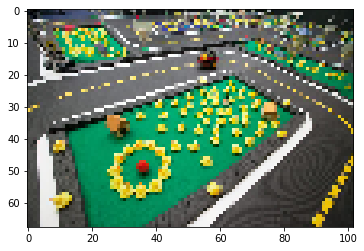

In [8]:
res = cv2.resize(imgrgb, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

res = cv2.resize(imgrgb, None, fx=.1, fy=.1, interpolation=cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

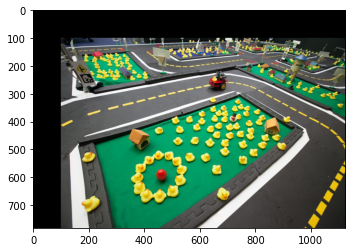

In [11]:
#@title Transformation Parameters { run: "auto" }
theta_degrees = 0 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type: "slider", min:-100, max:100, step:2}

"""
|cos(theta) - sin(theta) tx|
|sin(theta)   cos(theta) ty|
"""
rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi / 180
M = [
      [np.cos(radians), -np.sin(radians), shift_x],
      [np.sin(radians),  np.cos(radians), shift_y] 
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols, rows))

plt.imshow(res)
plt.show()

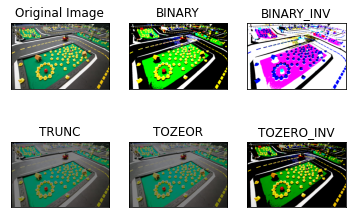

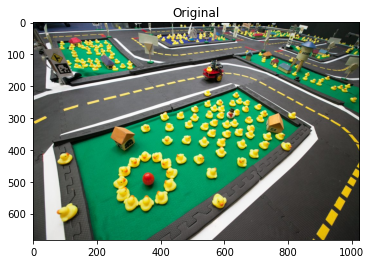

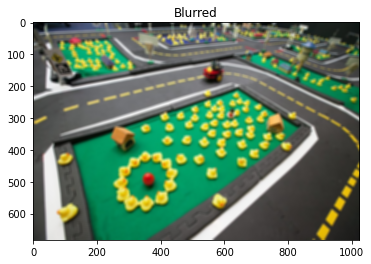

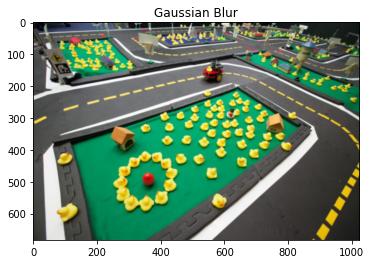

In [13]:
img = imgrgb

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZEOR', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh3, thresh4, thresh5]

for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

blur = cv2.blur(img, (10, 10))
gblur = cv2.GaussianBlur(imgrgb, (5, 5), 0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur), plt.title('Gaussian Blur')
plt.show()